In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing

### Read Data

In [95]:
data = pd.read_csv('churn.csv')
data.head()

,Unnamed: 0,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
1,2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
2,3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
3,4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
4,5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00


In [96]:
# Eliminate variables not carrying useful information
data = data.drop(columns = ['Unnamed: 0', 'CLIENTNUM'])

In [97]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import LabelEncoder
# from numpy import array

# enc = OneHotEncoder(sparse = False)
# ed_lev = LabelEncoder().fit_transform(data['Education_Level'])
# new_ed = enc.fit_transform(ed_lev.reshape(ed_lev.shape[0],1))
# print(new_ed[1])

In [98]:
# Encode categorical variables as dummy variables
data = pd.get_dummies(data, columns = ['Education_Level', 'Gender', 'Marital_Status', 'Income_Category', 'Card_Category'])
replace = {'Existing Customer' : 0, 'Attrited Customer' : 1}
data = data.replace(replace)
data.to_csv('preprocessed_data.csv')

In [99]:
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,1144,42,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,1291,33,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,1887,20,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,1171,20,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,816,28,...,0,0,1,0,0,0,1,0,0,0


### Split into Train and Test

In [83]:
train = int(round(data.shape[0]*0.8))
train_y, train_X = data.iloc[:train, 0].values, data.iloc[:train, 1:].values
test_y, test_X = data.iloc[train:, 0].values, data.iloc[train:, 1:].values
print(train_y.shape, train_X.shape, test_y.shape, test_X.shape)

(8102,) (8102, 33) (2025,) (2025, 33)


# Classification

## Classification with KNN

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Test Accuracy:  0.8217283950617283 with  1  neighbros 
 ------------------
Test Accuracy:  0.8207407407407408 with  3  neighbros 
 ------------------
Test Accuracy:  0.8246913580246914 with  5  neighbros 
 ------------------
Test Accuracy:  0.8212345679012346 with  7  neighbros 
 ------------------
Test Accuracy:  0.8207407407407408 with  9  neighbros 
 ------------------
Test Accuracy:  0.8202469135802469 with  11  neighbros 
 ------------------
Test Accuracy:  0.8217283950617283 with  13  neighbros 
 ------------------
Test Accuracy:  0.8202469135802469 with  15  neighbros 
 ------------------
Test Accuracy:  0.8192592592592592 with  17  neighbros 
 ------------------
Test Accuracy:  0.8202469135802469 with  19  neighbros 
 ------------------
Test Accuracy:  0.8197530864197531 with  21  neighbros 
 ------------------
Test Accuracy:  0.8187654320987654 with  23  neighbros 
 ------------------
Test Accuracy:  0.8197530864197531 with  25  neighbros 
 ------------------
Test Accuracy:  0

Text(0, 0.5, 'Accuracy')

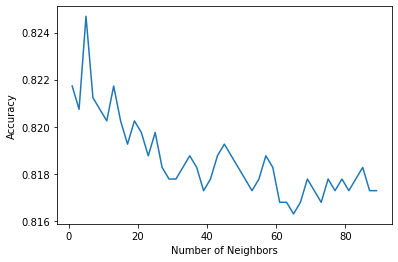

In [45]:
# Look at the way accuracy changes as the number of neighbors increases up to the square root of the 
# number of observations in our dataset

l = range(int(round(np.sqrt(len(train_y)))))
n = [i for i in l if i%2 != 0]
n_accuracy = []
for neighbors in n:
    clf = KNeighborsClassifier(n_neighbors = neighbors)
    clf.fit(train_X, train_y)
    predicted_churn = clf.predict(test_X)
    n_accuracy.append(np.sum(predicted_churn == test_y) / len(test_y))
    print("Test Accuracy: " ,np.sum(predicted_churn == test_y) / len(test_y), 'with ',neighbors, ' neighbros',
          '\n ------------------')
sns.lineplot(x = n, y = n_accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')    

In [73]:
total = dict(zip(n,n_accuracy))
arg_max = [i for i in range(len(n_accuracy)) if n_accuracy[i] == np.max(n_accuracy)]
print('Number of neighbors that maximizes test accuracy: ', n[arg_max[0]])

Number of neighbors that maximizes test accuracy:  5


Test Accuracy:  0.8246913580246914


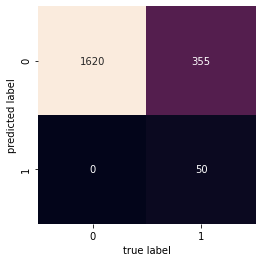

In [74]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(train_X, train_y)
predicted_churn = clf.predict(test_X)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
# accuracy
# print("Train Accuracy")
print("Test Accuracy: " , np.sum(predicted_churn == test_y) / len(test_y))

## Classification with SVM

In [85]:
from sklearn import svm

### Linear Kernel

Accuracy  0.825679012345679


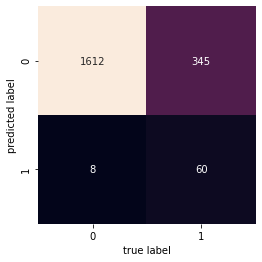

In [86]:
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(train_X, train_y)
predicted_churn = linear_clf.predict(test_X)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Accuracy " ,np.sum(predicted_churn == test_y) / len(test_y))

### Polinomial Kernel

Accuracy  0.8


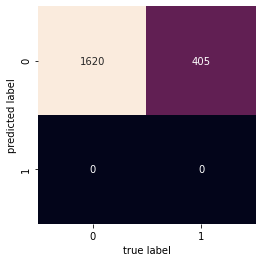

In [87]:
polynomial_clf = svm.SVC(kernel='poly')
polynomial_clf.fit(train_X, train_y)
predicted_churn = polynomial_clf.predict(test_X)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Accuracy " ,np.sum(predicted_churn == test_y) / len(test_y))

### RBF Kernel

Accuracy  0.8


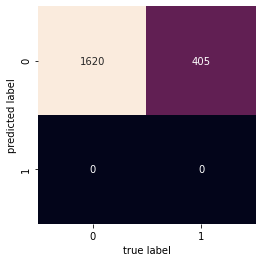

In [89]:
radial_clf = svm.SVC(kernel='rbf')
radial_clf.fit(train_X, train_y)
predicted_churn = radial_clf.predict(test_X)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Accuracy " ,np.sum(predicted_churn == test_y) / len(test_y))

# Explore the results using PCA

In [100]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_X = pca.fit_transform(data.iloc[:,1:10].values)
pca_train = pca_X[:train,:]
pca_test = pca_X[train:,:]

Accuracy  0.8


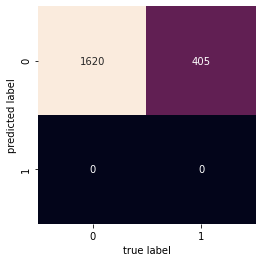

In [91]:
linear_clf = svm.SVC(kernel='linear')
linear_clf.fit(pca_train, train_y)
predicted_churn = linear_clf.predict(pca_test)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Accuracy " ,np.sum(predicted_churn == test_y) / len(test_y))

Accuracy  0.8


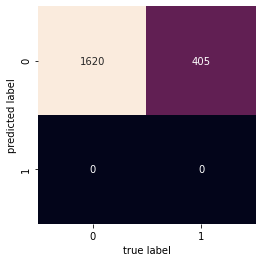

In [101]:
polynomial_clf = svm.SVC(kernel='poly')
polynomial_clf.fit(pca_train, train_y)
predicted_churn = polynomial_clf.predict(pca_test)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Accuracy " ,np.sum(predicted_churn == test_y) / len(test_y))

Accuracy  0.8


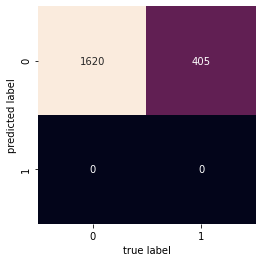

In [102]:
radial_clf = svm.SVC(kernel='rbf')
radial_clf.fit(pca_train, train_y)
predicted_churn = radial_clf.predict(pca_test)
mat = confusion_matrix(test_y, predicted_churn)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print("Accuracy " ,np.sum(predicted_churn == test_y) / len(test_y))